In [2]:
import tensorflow as tf
import os
import cv2
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
import numpy as np

base_dir = "C:\\Users\\kishore\\Downloads\\archive (5)\\data"

In [3]:
label = []       #  Assign all label
images_path = [] # Get all images path
all_images = []  # Check all images name
idx = 0          # index
img_label = []   # Assign image label



for directory in os.listdir(base_dir):
    label.append(directory)
    for img in os.listdir(os.path.join(base_dir,directory)):
        if len(re.findall('.png',img.lower())) != 0 or len(re.findall('.jpg',img.lower())) != 0 or len(re.findall('.jpeg',img.lower())) != 0:
            img_path = os.path.join(os.path.join(base_dir,directory),img)
            all_images.append(img)
            images_path.append(img_path)
            img_label.append(directory)

In [4]:
img_shape = cv2.imread(images_path[0])

print(f"Labels : { label}")
print(f"Total Images : {len(all_images)}")
print(f" Images shape : {img_shape.shape}")

Labels : ['non-vehicles', 'vehicles']
Total Images : 17760
 Images shape : (64, 64, 3)


In [5]:
data =pd.DataFrame({'image':images_path,'label':img_label}) 
data

,image,label
0,C:\Users\kishore\Downloads\archive (5)\data\no...,non-vehicles
1,C:\Users\kishore\Downloads\archive (5)\data\no...,non-vehicles
2,C:\Users\kishore\Downloads\archive (5)\data\no...,non-vehicles
3,C:\Users\kishore\Downloads\archive (5)\data\no...,non-vehicles
4,C:\Users\kishore\Downloads\archive (5)\data\no...,non-vehicles
...,...,...
17755,C:\Users\kishore\Downloads\archive (5)\data\ve...,vehicles
17756,C:\Users\kishore\Downloads\archive (5)\data\ve...,vehicles
17757,C:\Users\kishore\Downloads\archive (5)\data\ve...,vehicles
17758,C:\Users\kishore\Downloads\archive (5)\data\ve...,vehicles


In [6]:
data = data.sample(frac=1).reset_index()
data.head()

,index,image,label
0,9297,C:\Users\kishore\Downloads\archive (5)\data\ve...,vehicles
1,14767,C:\Users\kishore\Downloads\archive (5)\data\ve...,vehicles
2,3138,C:\Users\kishore\Downloads\archive (5)\data\no...,non-vehicles
3,4184,C:\Users\kishore\Downloads\archive (5)\data\no...,non-vehicles
4,2438,C:\Users\kishore\Downloads\archive (5)\data\no...,non-vehicles


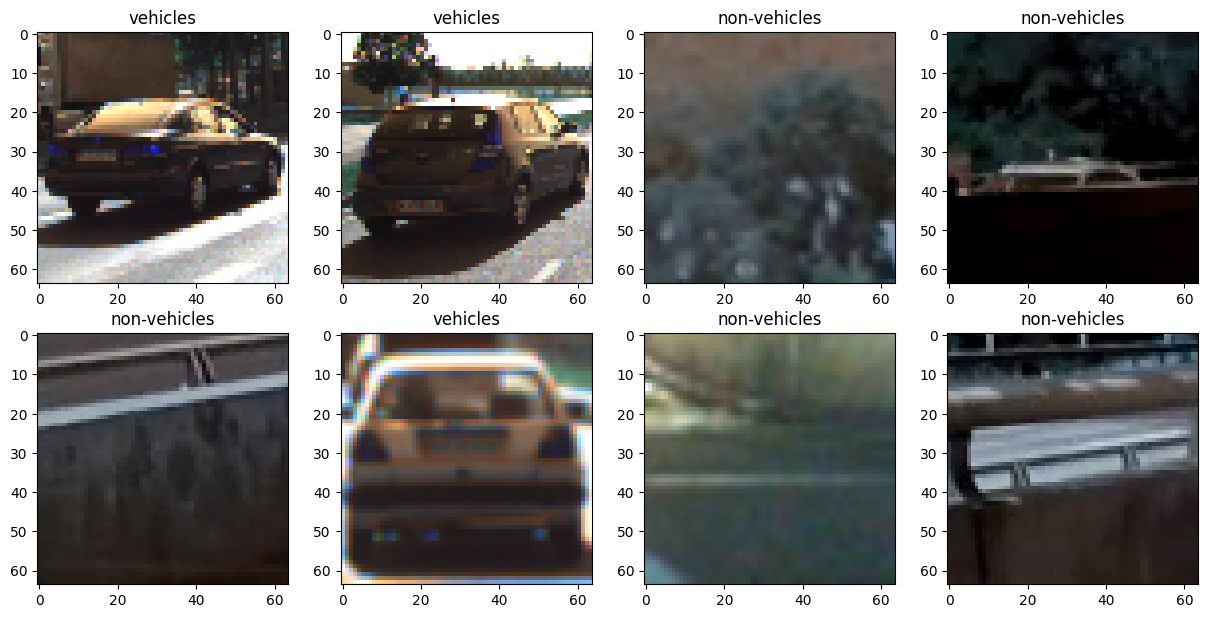

In [7]:
fig = plt.figure(figsize=(15,15))

for i in range(8):
    fig.add_subplot(4,4,i+1).set_title(data['label'][i])
    img = cv2.imread(data['image'][i])
    plt.imshow(img)
    
plt.show()

c:\Users\kishore\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kishore\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kishore\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


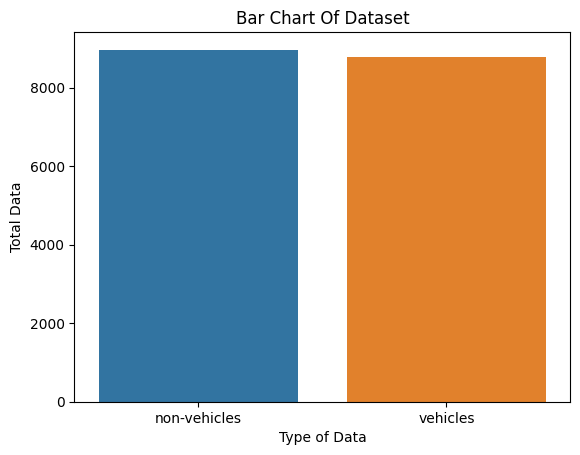

Total Images class [0]:8968
Total Images class [1]:8792


C:\Users\kishore\AppData\Local\Temp\ipykernel_856\3365215321.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Total Images class [0]:{data_label[0]}")
C:\Users\kishore\AppData\Local\Temp\ipykernel_856\3365215321.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Total Images class [1]:{data_label[1]}")


In [8]:
data_label = data['label'].value_counts()
plt.figure()
sns.barplot(x = data_label.index, y = data_label)
plt.xlabel("Type of Data")
plt.ylabel("Total Data")
plt.title("Bar Chart Of Dataset")
plt.show()
print(f"Total Images class [0]:{data_label[0]}")
print(f"Total Images class [1]:{data_label[1]}")

In [9]:
X_train,X_test = train_test_split(data,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)

(14208, 3)
(3552, 3)


In [10]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.1,
                                    rotation_range = 25,
                                    width_shift_range = 0.1,
                                    height_shift_range = 0.1,
                                    horizontal_flip = True,
                                    validation_split = 0.2)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
training_set = train_datagen.flow_from_dataframe(
    dataframe = X_train,
    x_col = "image",
    y_col = "label",
    target_size = (64, 64),
    color_mode = "rgb",
    class_mode = "categorical",
    batch_size = 32,
    shuffle = True,
    seed = 2,
    subset = "training")
validation_set = train_datagen.flow_from_dataframe(
    dataframe = X_train,
    x_col = "image",
    y_col = "label",
    target_size = (64, 64),
    color_mode ="rgb",
    class_mode = "categorical",
    batch_size = 32,
    shuffle = True,
    seed = 2,
    subset = "validation")
test_set = test_datagen.flow_from_dataframe(
    dataframe = X_test,
    x_col = "image",
    y_col = "label",
    target_size = (64, 64),
    color_mode ="rgb",
    class_mode = "categorical",
    shuffle = False,
    batch_size = 32)

Found 11367 validated image filenames belonging to 2 classes.
Found 2841 validated image filenames belonging to 2 classes.
Found 3552 validated image filenames belonging to 2 classes.


In [12]:
print(f" Total training images {X_train.shape[0]}")
print(f" Total test images {X_test.shape[0]}")

print(f" Train Set Size : {(training_set.samples)}")
print(f" Validation Set Size : {(validation_set.samples)}")
print(f" Testing Set Size : {(test_set.samples)}")

 Total training images 14208
 Total test images 3552
 Train Set Size : 11367
 Validation Set Size : 2841
 Testing Set Size : 3552


In [13]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (64,64,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(64, activation = "relu"))
model.add(Dense(2, activation = "softmax"))

In [14]:
model.compile(optimizer = 'adam', loss= "categorical_crossentropy", metrics=["acc"])

In [15]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=1, verbose=1)

In [16]:
history = model.fit(training_set, epochs=10,validation_data = validation_set, callbacks=[early_stopping],batch_size=32)

Epoch 1/10
356/356 [==============================] - 399s 1s/step - loss: 0.2560 - acc: 0.8829 - val_loss: 0.1132 - val_acc: 0.9542
Epoch 2/10
356/356 [==============================] - 126s 354ms/step - loss: 0.1139 - acc: 0.9602 - val_loss: 0.0810 - val_acc: 0.9711
Epoch 3/10
356/356 [==============================] - 127s 356ms/step - loss: 0.0516 - acc: 0.9837 - val_loss: 0.0713 - val_acc: 0.9873
Epoch 4/10
356/356 [==============================] - 126s 355ms/step - loss: 0.0450 - acc: 0.9854 - val_loss: 0.0430 - val_acc: 0.9838
Epoch 5/10
356/356 [==============================] - 127s 356ms/step - loss: 0.0422 - acc: 0.9872 - val_loss: 0.0450 - val_acc: 0.9863
Epoch 5: early stopping


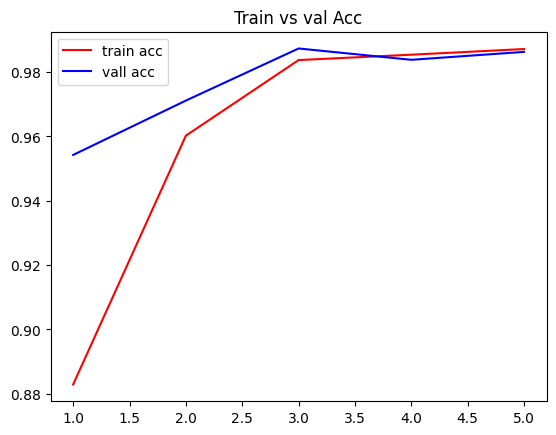

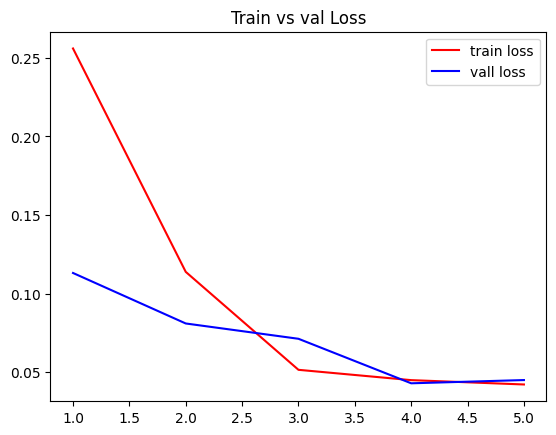

In [17]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history["loss"]
val_loss = history.history['val_loss']

epochs = range(1,len(train_acc)+1)
plt.figure()
plt.title("Train vs val Acc")
plt.plot(epochs,train_acc,'red',label="train acc")
plt.plot(epochs,val_acc,'blue',label="vall acc")
plt.legend()
plt.show()

plt.figure()
plt.title("Train vs val Loss")
plt.plot(epochs,train_loss,'red',label="train loss")
plt.plot(epochs,val_loss,'blue',label="vall loss")
plt.legend()

plt.show()

In [18]:
test_score = model.evaluate(test_set)

111/111 [==============================] - 88s 798ms/step - loss: 0.0291 - acc: 0.9890


In [19]:
print(f'Test Score:{test_score[1]}')
print(f'Test Loss:{test_score[0]}')

Test Score:0.9890202879905701
Test Loss:0.029095428064465523


In [20]:
predicted_label = model.predict(test_set)
predicted_label = np.argmax(predicted_label,axis=1)
predicted_label

111/111 [==============================] - 6s 52ms/step


array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
test_class =test_set.labels
test_class = np.array(test_class)
test_class2 = test_class.flatten()
test_class2

array([0, 1, 0, ..., 0, 0, 0])

In [22]:
class_ind = test_set.class_indices
labels_id = list(class_ind.keys())
labels_id

['non-vehicles', 'vehicles']

              precision    recall  f1-score   support

non-vehicles       0.99      0.98      0.99      1767
    vehicles       0.98      0.99      0.99      1785

    accuracy                           0.99      3552
   macro avg       0.99      0.99      0.99      3552
weighted avg       0.99      0.99      0.99      3552



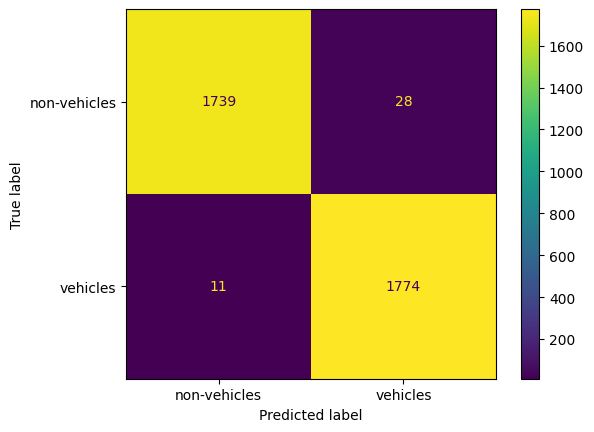

In [23]:
confusion_data = confusion_matrix(test_class2,predicted_label)

# Classification report
print(classification_report(test_class2, predicted_label, target_names= labels_id))


cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_data, display_labels = labels_id)

cm_display.plot()
plt.show()

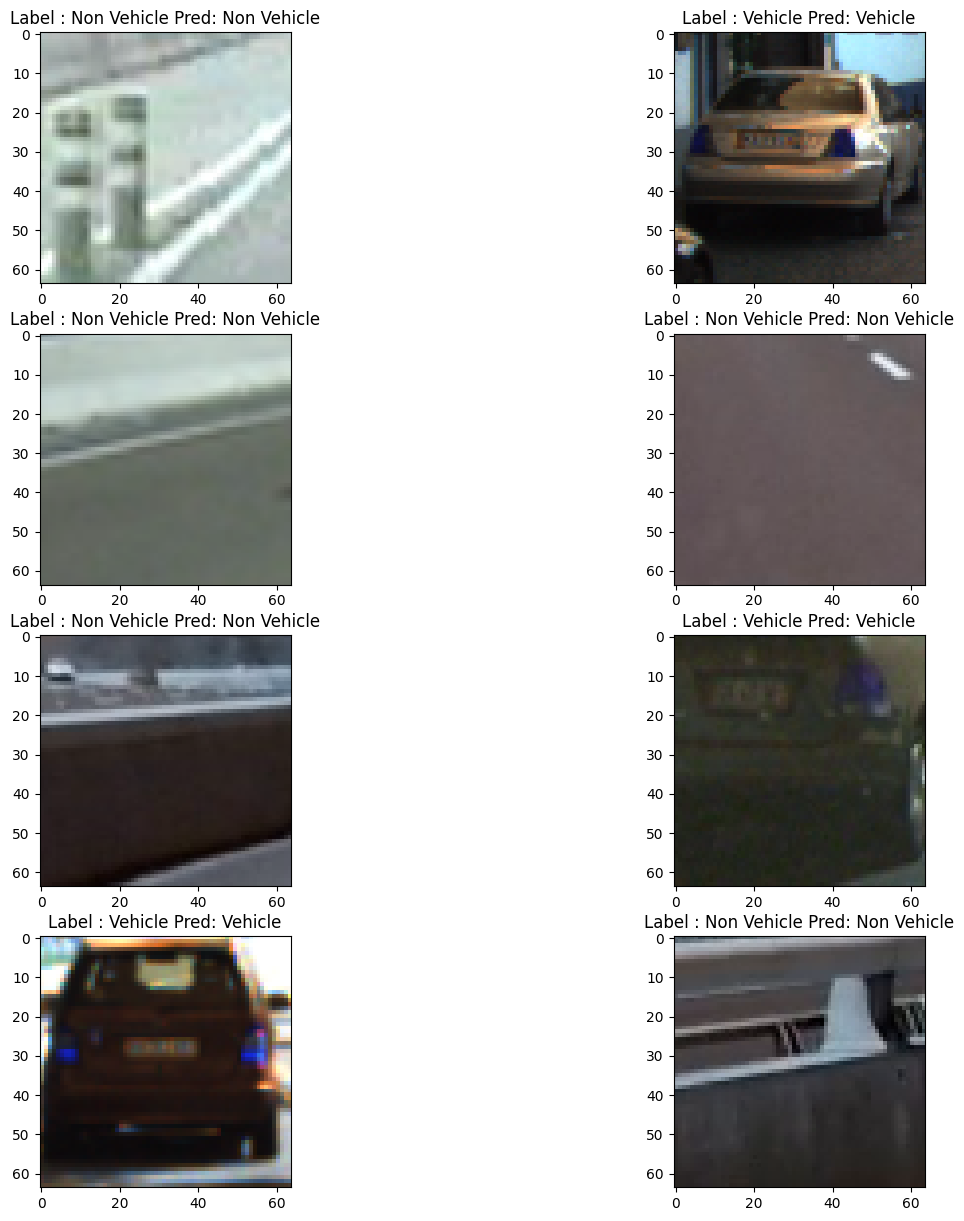

In [24]:
test_datas = test_set.filenames
labels_data = test_set.labels

fig = plt.figure(figsize=(15,15))

for i in range(8):
    if labels_data[i] == 0:
        test_label = "Non Vehicle"
    else:
        test_label = "Vehicle"
    if predicted_label[i] == 0:
        predict_lab = "Non Vehicle"
    else :
        predict_lab = "Vehicle"
    label = "Label : "+ test_label +" Pred: "+predict_lab
    
    fig.add_subplot(4,2,i+1).set_title(label)
    img = cv2.imread(test_datas[i])
    plt.imshow(img)
    
plt.show()